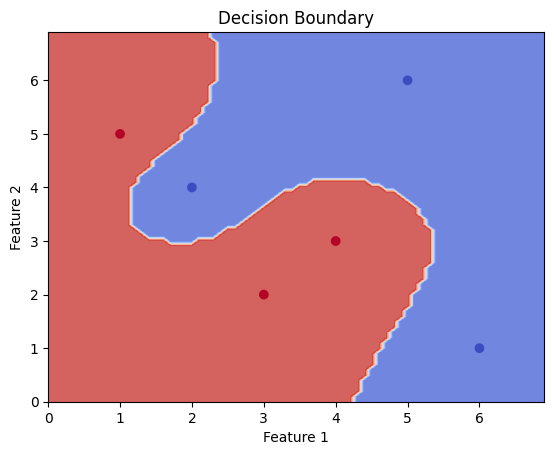

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 学習パターンの定義
X = np.array([[1, 5], [3, 2], [4, 3], [5, 6], [2, 4], [6, 1]])

# クラスラベルの定義 (ω1: 1, ω2: -1)
Y = np.array([1, 1, 1, -1, -1, -1])

# ガウス関数のパラメータ
sigma = 2.0

# ポテンシャル関数を計算する関数
def potential_function(x, y, sigma):
    return np.exp(-np.linalg.norm(x - y) / (2 * sigma**2))

# ポテンシャル行列の初期化
N = len(X)
P = np.zeros((N, N))

# ポテンシャル行列の計算
for i in range(N):
    for j in range(N):
        P[i, j] = potential_function(X[i], X[j], sigma)

# 学習パラメータの計算
alpha = np.linalg.inv(P).dot(Y)

# グリッドポイントの定義
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 決定境界の計算
Z = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        potential_values = np.array([potential_function(point, x, sigma) for x in X])
        Z[i, j] = np.sign(np.sum(alpha * potential_values))

# 決定境界のプロット
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()


## コード解説：SVMによる決定境界の可視化

**このコードは、サポートベクターマシン (SVM) を用いて、2次元データの**決定境界** を可視化します**。**

**コードの流れ:**

1. **ライブラリのインポート:**
    - `numpy` モジュールを `np` としてインポートします。
    - `matplotlib.pyplot` モジュールを `plt` としてインポートします。
2. **学習パターンの定義:**
    - `X` 変数に、学習データの入力特徴ベクトルを `numpy` 配列として定義します。
    - 各行が1つのデータ点に対応し、各列が1つの特徴に対応します。
    - 例：
        ```python
        X = np.array([[1, 5], [3, 2], [4, 3], ...])
        ```
3. **クラスラベルの定義:**
    - `Y` 変数に、各データ点のクラスラベルを `numpy` 配列として定義します。
    - 各要素が1つのデータ点に対応し、値はデータ点のクラスを表します。
    - 例：
        ```python
        Y = np.array([1, 1, 1, -1, -1, -1])
        ```
4. **ガウス関数のパラメータ:**
    - `sigma` 変数に、ガウス関数の標準偏差を定義します。
    - この値は、カーネル関数の幅を決定します。
5. **ポテンシャル関数を計算する関数:**
    - `potential_function` 関数を定義します。
    - この関数は、2つのデータ点間のポテンシャル値を計算します。
    - ガウス関数を使用して、2つのデータ点間の距離に基づいてポテンシャル値を計算します。
6. **ポテンシャル行列の初期化:**
    - `N` 変数に、学習データの個数 (サンプル数) を定義します。
    - `P` 変数に、ポテンシャル行列を `numpy` 配列として初期化します。
    - ポテンシャル行列は、N x N の行列で、(i, j) 番目の要素は、データ点 i とデータ点 j の間のポテンシャル値を表します。
7. **ポテンシャル行列の計算:**
    - `for` ループを使用して、ポテンシャル行列の各要素を計算します。
    - `potential_function` 関数を使用して、2つのデータ点間のポテンシャル値を計算します。
8. **学習パラメータの計算:**
    - `alpha` 変数に、学習パラメータを計算します。
    - 学習パラメータは、ポテンシャル行列の逆行列とクラスラベルベクトルの内積として計算されます。
9. **グリッドポイントの定義:**
    - `x_min`、`x_max` 変数に、x軸の最小値と最大値を定義します。
    - `y_min`、`y_max` 変数に、y軸の最小値と最大値を定義します。
    - これらの値は、プロットされる領域を決定します。
    - `xx`、`yy` 変数に、グリッドポイントを生成します。
    - グリッドポイントは、(x, y) 座標の組み合わせで構成されます。
10. **決定境界の計算:**
    - `Z` 変数に、決定境界の値を格納する `numpy` 配列を初期化します。
    - `for` ループを使用して、各グリッドポイントにおける決定境界の値を計算します。
    - `potential_function` 関数を使用して、グリッドポイントと各データ点間のポテンシャル値を計算します。
    - 学習パラメータ `alpha` とポテンシャル値を使用して、決定境界の値を計算します。
11. **決定境界のプロット:**
    - `plt.contourf` 関数を使用して、決定境界をカラーマップでプロットします。
    - `plt.scatter` 関数を使用して、学習データを散布図でプロットします。
    - 軸ラベルとタイトルを設定します。
    - `plt.show` 関数を使用して、グラフを表示します。

**このコード** を実行すると、**2次元データ** の**決定境界** が可視化されます。

**決定境界** は、**異なるクラス** に属するデータ点を**分離** する曲線です。

**SVM** は、**この決定境界** を学習データから**自動的に** 導き出します。

**このコード